In [100]:
import pandas as pd
import numpy as np


In [101]:
df=pd.read_csv('AdSmartABdata.csv')
df.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


# Exploratory Data Analysis

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


In [103]:
#adding a response column (1-user responded, 0-user did not respond)
df.loc[(df['yes']==1)|(df['no']==1),'response']=1
df['response']=df['response'].fillna(0)
df

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no,response
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0,0.0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0,0.0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1,1.0
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0,0.0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...
8072,ffea24ec-cec1-43fb-b1d1-8f93828c2be2,exposed,2020-07-05,7,Generic Smartphone,6,Chrome Mobile,0,0,0.0
8073,ffea3210-2c3e-426f-a77d-0aa72e73b20f,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0,0.0
8074,ffeaa0f1-1d72-4ba9-afb4-314b3b00a7c7,control,2020-07-04,9,Generic Smartphone,6,Chrome Mobile,0,0,0.0
8075,ffeeed62-3f7c-4a6e-8ba7-95d303d40969,exposed,2020-07-05,15,Samsung SM-A515F,6,Samsung Internet,0,0,0.0


In [104]:
# number of data points
print(f" Number of rows:  {df.shape[0]} \n Number of columns: {df.shape[1]} ")

 Number of rows:  8077 
 Number of columns: 10 


In [105]:
#number of unique values per column
unique_values=pd.DataFrame(df.apply(lambda x: len(x.value_counts(dropna=False)), axis=0), 
                           columns=['Unique Value Count']).sort_values(by='Unique Value Count', ascending=True)
unique_values

,Unique Value Count
experiment,2
yes,2
no,2
response,2
platform_os,3
date,8
browser,15
hour,24
device_make,270
auction_id,8077


In [106]:
# the percentage of missing values in the dataset
def missing_values(x):

    # Total number of elements in the dataset
    totalCells = x.size

    #Number of missing values per column
    missingCount = x.isnull().sum()

    #Total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    print("The dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

missing_values(df)

The dataset contains 0.0 % missing values.


# Analysis of categorical variables 

In [107]:
#distibution of users in each group
import matplotlib.pyplot as plt
import seaborn as sns

df['experiment'].value_counts()

control    4071
exposed    4006
Name: experiment, dtype: int64

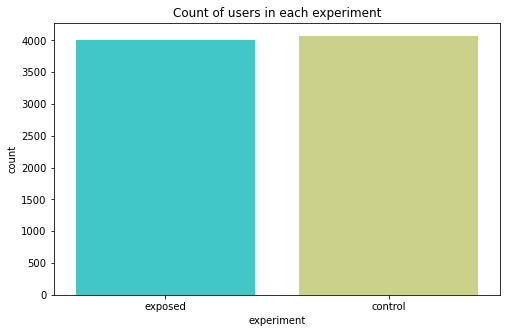

In [108]:

plt.figure(figsize=(8,5))
sns.countplot(x='experiment',data=df,palette='rainbow')
plt.title('Count of users in each experiment')
plt.show()

The number of users have been equally distributed between the exposed group and the experiment group

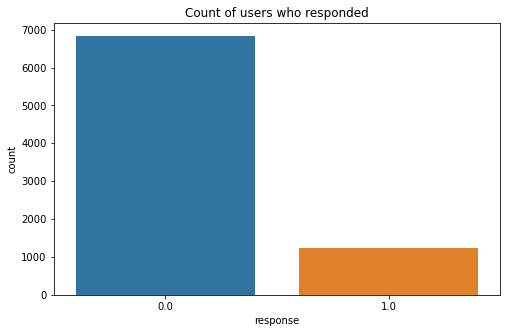

In [142]:
plt.figure(figsize=(8,5))
sns.countplot(x='response',data=df)

plt.title('Count of users who responded')
plt.show()

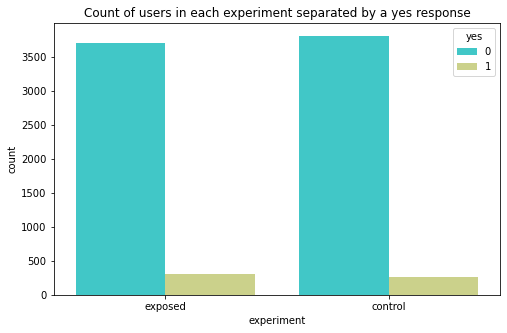

In [149]:
plt.figure(figsize=(8,5))
sns.countplot(x='experiment',hue='yes',data=df,palette='rainbow')

plt.title('Count of users in each experiment separated by a yes response')
plt.show()

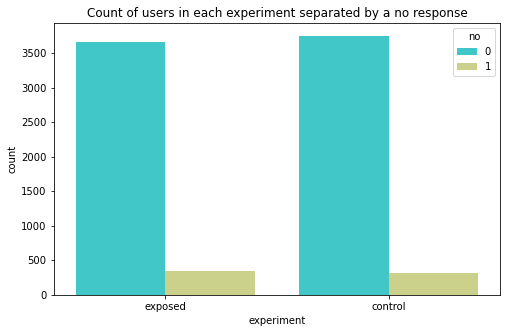

In [110]:
plt.figure(figsize=(8,5))
sns.countplot(x='experiment',hue='no',data=df,palette='rainbow')

plt.title('Count of users in each experiment separated by a no response')
plt.show()

 From the above plots , it can be seen that a very small propotion of users actually responded to the question whether or not they are aware of the brand.

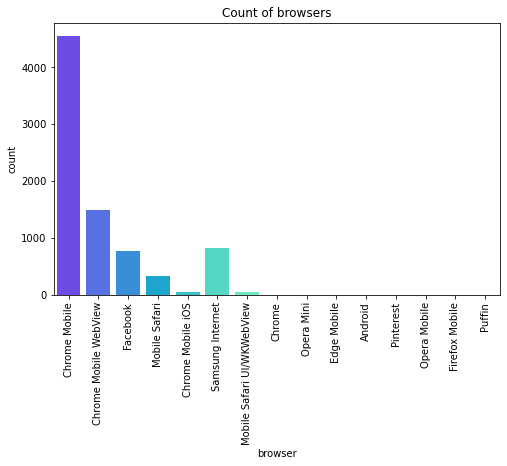

In [150]:
#distribution of browsers
plt.figure(figsize=(8,5))
sns.countplot(x='browser',data=df,palette='rainbow')
plt.title('Count of browsers')
plt.xticks(rotation=90)
plt.show()

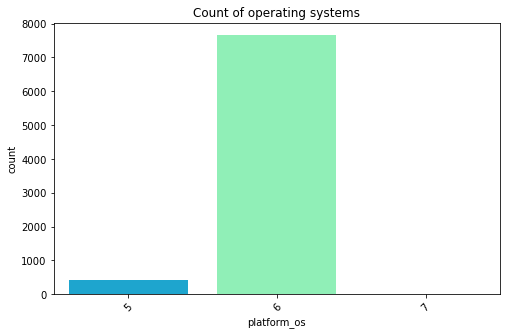

In [112]:
#distribution of operating system
plt.figure(figsize=(8,5))
sns.countplot(x='platform_os',data=df,palette='rainbow')
plt.title('Count of operating systems')
plt.xticks(rotation=45)
plt.show()

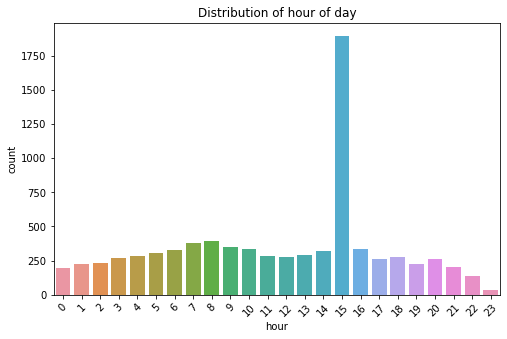

In [113]:
#distribution of hour of day

plt.figure(figsize=(8,5))
sns.countplot(x='hour',data=df)
plt.title('Distribution of hour of day')
plt.xticks(rotation=45)
plt.show()

 Most of the users responded at hour 15 and the least number of users at hour 23

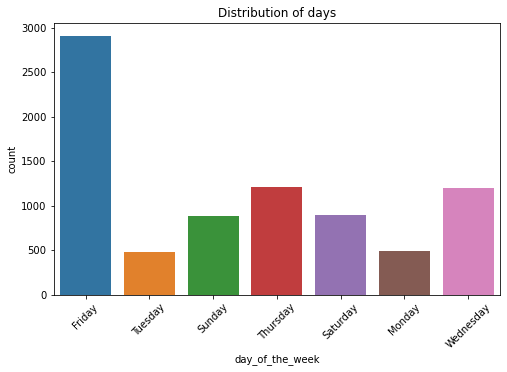

In [114]:
df['date']=pd.to_datetime(df.date)
df['day_of_the_week']=df['date'].dt.day_name()
#distribution of day of the week
plt.figure(figsize=(8,5))
sns.countplot(x='day_of_the_week',data=df)
plt.title('Distribution of days')
plt.xticks(rotation=45)
plt.show()

 The most responses have been recorded on a Friday while the least is on a Tuesday

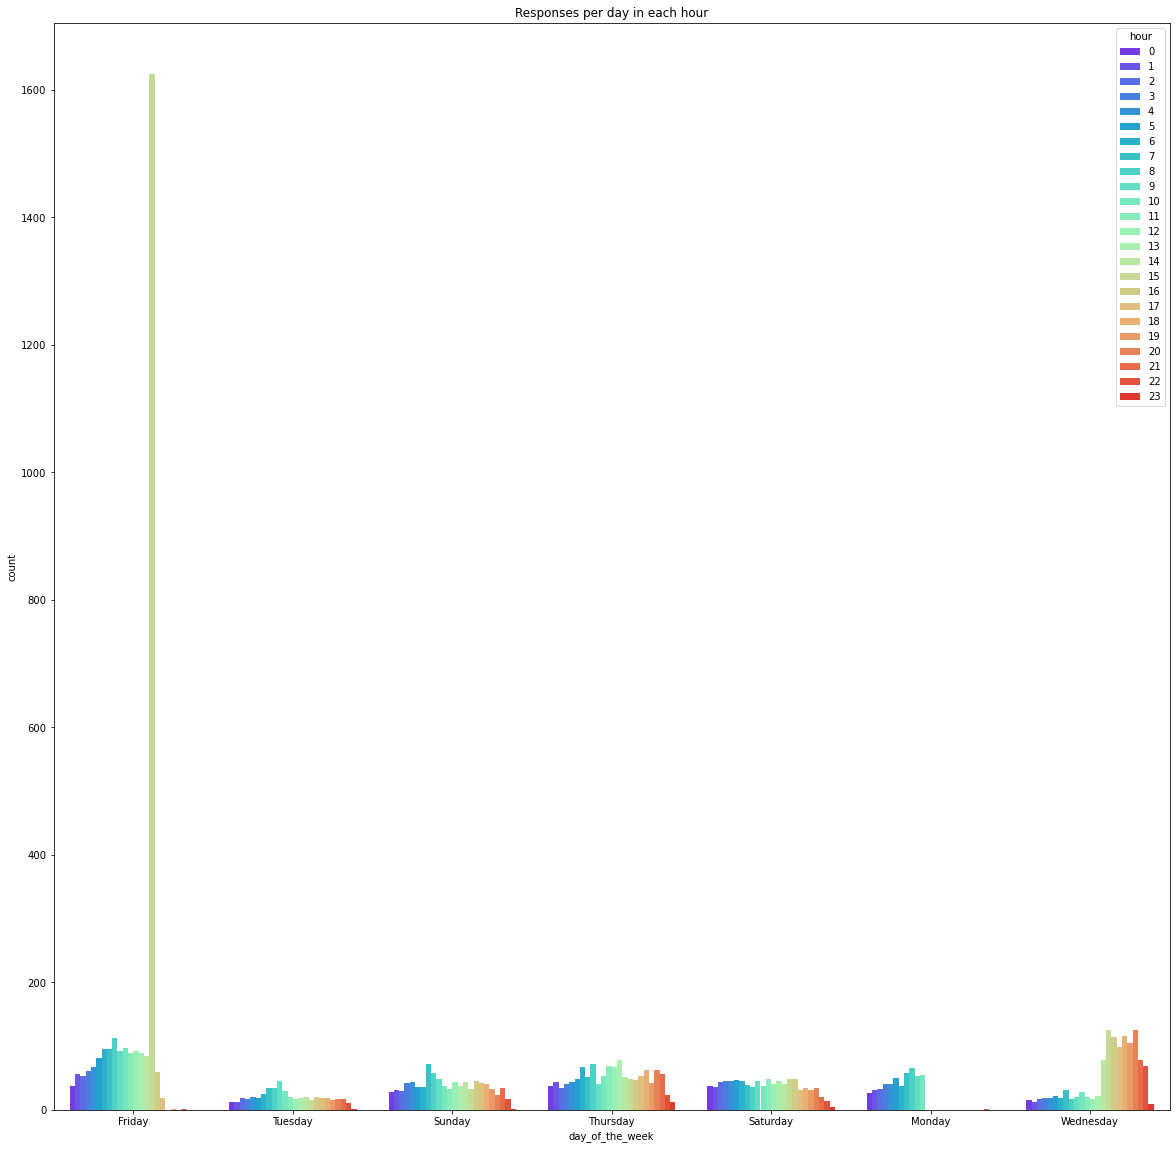

In [115]:
plt.figure(figsize=(20,20))
sns.countplot(x='day_of_the_week',hue='hour',data=df,palette='rainbow')

plt.title('Responses per day in each hour')
plt.show()

 Responses on Friday at hour 15 are the most while on Monday there are few to no responses past hour 10

# Hypothesis testing

The null hypothesis states that there is no difference in brand awareness between the exposed and control groups in the current case.  The level of significance is set at 0.05

### Using the z-test to calculate the p-value

In [116]:
import scipy.stats as stats
import statsmodels.stats.api as sms
import matplotlib as mpl
import matplotlib.pyplot as plt
from math import ceil
%matplotlib inline

from statsmodels.stats.proportion import proportions_ztest,proportion_confint

### Choosing the sample size

The sample size is estimated using Power Analysis. This depends on the power of the test,the alpha value and the effect size

In [136]:
effect_size=sms.proportion_effectsize(0.20,0.25)
required_n=sms.NormalIndPower().solve_power(
    effect_size,
    power=0.8,
    alpha=0.05,
    ratio=1)
required_n=ceil(required_n)
required_n

1092

In [137]:
#random sampling from the dataset to abtain a sample size of 1092
control_sample=df[df['experiment']=='control'].sample(n=required_n, random_state=22)
exposed_sample=df[df['experiment']=='exposed'].sample(n=required_n, random_state=22)

ab_test=pd.concat([control_sample,exposed_sample],axis=0)
ab_test.reset_index(drop=True, inplace=True)

In [138]:
ab_test

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no,response,day_of_the_week
0,e1d49107-f02f-4e09-8750-b22ae05d841d,control,2020-07-06,6,Generic Smartphone,6,Chrome Mobile,0,0,0.0,Monday
1,8b39c872-00f5-4278-9f0f-f8a096f4d076,control,2020-07-09,6,Generic Smartphone,6,Chrome Mobile,0,0,0.0,Thursday
2,6d39d727-e406-4aee-acd9-6ce280018c73,control,2020-07-04,6,Generic Smartphone,6,Chrome Mobile,0,0,0.0,Saturday
3,e44b9ba2-9a29-4477-a6ee-4913293a1a8b,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0,0.0,Friday
4,9839dfb9-13ee-4361-85f6-7e132ce30396,control,2020-07-03,15,Samsung SM-G980F,6,Facebook,0,1,1.0,Friday
...,...,...,...,...,...,...,...,...,...,...,...
2179,41a3b6f6-3fb1-487d-b596-00ace314417f,exposed,2020-07-10,14,Samsung SM-G900F,6,Chrome Mobile WebView,0,0,0.0,Friday
2180,ba8728e0-4cd2-4dd1-b366-1545a8628781,exposed,2020-07-06,10,Samsung SM-A105FN,6,Samsung Internet,0,0,0.0,Monday
2181,f49a6027-3cdb-4a1f-b866-ae24241858b2,exposed,2020-07-09,13,Generic Smartphone,6,Chrome Mobile,1,0,1.0,Thursday
2182,9e02a887-60dc-40e0-acf6-789694c294e3,exposed,2020-07-08,15,Generic Smartphone,6,Chrome Mobile,0,0,0.0,Wednesday


#calculating the sample size
def sample(N,cl,e,p):
    #calculate the z-score
    z=stats.norm.ppf(1-(1-cl)/2)
    #calculate n_0 value
    n_0=z**2*p*(1-p)/e**2
    #calculate n
    n=n_0/(1+(n_0-1)/N)
    #rounding up
    n=ceil(n)
    return n
sample_size=sample(8076,0.95,0.05,0.5)
sample_size

In [139]:
conversion_rates=ab_test.groupby('experiment')['response']
#standard deviation of the proportion
std_p=lambda x: np.std(x,ddof=0)
#standard error of the proportion
se_p=lambda x:stats.sem(x,ddof=0)

conversion_rates=conversion_rates.agg([np.mean,std_p,se_p])
conversion_rates.columns=['conversion_rate','std_deviation','std_error']
conversion_rates.style.format('{:.3f}')

,conversion_rate,std_deviation,std_error
experiment,,,
control,0.148,0.355,0.011
exposed,0.160,0.367,0.011


In [119]:
control_results=ab_test[ab_test['experiment']=='control']['response']
exposed_results=ab_test[ab_test['experiment']=='exposed']['response']

n_con=control_results.count()
n_exp=exposed_results.count()
successes=[control_results.sum(),exposed_results.sum()]
nobs=[n_con, n_exp]

In [120]:
z_stat,pval=proportions_ztest(successes,nobs=nobs)
z_stat,pval

(-2.0181521873088912, 0.0435754139306743)

Since the obtained  p-value is 0.043 , which is lower than the alpha of 0.05, the null hypothesis is rejected .
This means that there is a significant difference between the control group and the exposed group

# ML modelling with MLOps


Split data by browser and platform_os, and version each split as a new version of the data in dvc.


In [159]:
df


,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no,response,day_of_the_week
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0,0.0,Friday
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0,0.0,Tuesday
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1,1.0,Sunday
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0,0.0,Friday
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0,0.0,Friday
...,...,...,...,...,...,...,...,...,...,...,...
8072,ffea24ec-cec1-43fb-b1d1-8f93828c2be2,exposed,2020-07-05,7,Generic Smartphone,6,Chrome Mobile,0,0,0.0,Sunday
8073,ffea3210-2c3e-426f-a77d-0aa72e73b20f,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0,0.0,Friday
8074,ffeaa0f1-1d72-4ba9-afb4-314b3b00a7c7,control,2020-07-04,9,Generic Smartphone,6,Chrome Mobile,0,0,0.0,Saturday
8075,ffeeed62-3f7c-4a6e-8ba7-95d303d40969,exposed,2020-07-05,15,Samsung SM-A515F,6,Samsung Internet,0,0,0.0,Sunday


In [162]:
#selecting only the users who responded
new_df=df.loc[df['response']!=0]
new_df.shape

(1243, 11)

In [163]:
unique_values=pd.DataFrame(new_df.apply(lambda x: len(x.value_counts(dropna=False)), axis=0), 
                           columns=['Unique Value Count']).sort_values(by='Unique Value Count', ascending=True)
unique_values

,Unique Value Count
response,1
experiment,2
platform_os,2
yes,2
no,2
day_of_the_week,7
date,8
browser,8
hour,24
device_make,115


In [177]:
#converting the new dataframe to a csv file
new_df.to_csv('responded_users.csv')

## Splitting by platform_os

In [172]:

new_df['platform_os'].value_counts()

6    1226
5      17
Name: platform_os, dtype: int64

In [176]:
#selecting only the users who use platform_os labeled 6
platform_os6=new_df.loc[new_df['platform_os']==6]
platform_os6.to_csv('platform_os6.csv')
platform_os6.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no,response,day_of_the_week
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1,1.0,Sunday
16,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1,0,1.0,Saturday
20,00a1384a-5118-4d1b-925b-6cdada50318d,exposed,2020-07-06,8,Generic Smartphone,6,Chrome Mobile,0,1,1.0,Monday
23,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1,0,1.0,Wednesday
27,00ebf4a8-060f-4b99-93ac-c62724399483,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,1,1.0,Friday


In [174]:
#selecting only the users who use platform_os labeled 5
platform_os5=new_df.loc[new_df['platform_os']==5]
platform_os5.to_csv('platform_os5.csv')
platform_os5

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no,response,day_of_the_week
1097,23b2028c-72ed-43b3-a2d7-d772b2d4d478,exposed,2020-07-03,8,iPhone,5,Mobile Safari,0,1,1.0,Friday
2630,54a62f37-0c4d-4300-a063-1c6aa99244e5,control,2020-07-03,15,iPhone,5,Mobile Safari,0,1,1.0,Friday
2631,54a68ad2-eed9-408e-9088-ddecfa64b0fd,control,2020-07-03,15,iPhone,5,Mobile Safari UI/WKWebView,0,1,1.0,Friday
3240,688aaac1-535e-417a-a8d4-a529b033cbfa,control,2020-07-04,3,iPhone,5,Mobile Safari,1,0,1.0,Saturday
3843,7c003bed-32c3-4236-abf0-f571debe769b,exposed,2020-07-05,3,iPhone,5,Mobile Safari,1,0,1.0,Sunday
4245,8800e2cd-984d-4072-a6eb-1fbb597750be,exposed,2020-07-08,5,iPhone,5,Mobile Safari,0,1,1.0,Wednesday
4706,95ecf46d-b3d2-46c3-b3ad-14ce40a9ebc4,control,2020-07-10,14,iPhone,5,Mobile Safari UI/WKWebView,0,1,1.0,Friday
4749,97551eb7-3e6e-42ba-b6b4-c57e779c3078,control,2020-07-04,12,iPhone,5,Mobile Safari,0,1,1.0,Saturday
4871,9b3af700-b1f9-47a3-a510-a939e06af5ae,control,2020-07-06,1,iPhone,5,Mobile Safari,0,1,1.0,Monday
5278,a73ec6ae-0524-459a-bdf8-5ab9f04c213c,control,2020-07-09,9,iPhone,5,Mobile Safari,1,0,1.0,Thursday


## Splitting by browsers

In [178]:
new_df['browser'].value_counts()

Chrome Mobile                 695
Chrome Mobile WebView         227
Facebook                      156
Samsung Internet              145
Mobile Safari                  14
Mobile Safari UI/WKWebView      3
Chrome                          2
Chrome Mobile iOS               1
Name: browser, dtype: int64

In [180]:
ChromeMobile=new_df.loc[new_df['browser']=='Chrome Mobile']
ChromeMobile.to_csv('Chrome Mobile.csv')
ChromeMobile

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no,response,day_of_the_week
16,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1,0,1.0,Saturday
20,00a1384a-5118-4d1b-925b-6cdada50318d,exposed,2020-07-06,8,Generic Smartphone,6,Chrome Mobile,0,1,1.0,Monday
27,00ebf4a8-060f-4b99-93ac-c62724399483,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,1,1.0,Friday
39,013e45cf-e388-46a4-9c5b-a34303613940,exposed,2020-07-10,2,Generic Smartphone,6,Chrome Mobile,0,1,1.0,Friday
45,018af862-486e-4da1-a85b-71872120e57c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,1,0,1.0,Friday
...,...,...,...,...,...,...,...,...,...,...,...
8059,ffa08ff9-a132-4051-aef5-01a9c79367bc,exposed,2020-07-05,21,Generic Smartphone,6,Chrome Mobile,1,0,1.0,Sunday
8063,ffb176df-ecd2-45d3-b05f-05b173a093a7,exposed,2020-07-04,1,Generic Smartphone,6,Chrome Mobile,1,0,1.0,Saturday
8064,ffb79718-6f25-4896-b6b3-e58b80a6e147,control,2020-07-09,7,Generic Smartphone,6,Chrome Mobile,0,1,1.0,Thursday
8069,ffca1153-c182-4f32-9e90-2a6008417497,control,2020-07-10,16,Generic Smartphone,6,Chrome Mobile,0,1,1.0,Friday


In [181]:
ChromeMobileWebView=new_df.loc[new_df['browser']=='Chrome Mobile WebView']
ChromeMobileWebView.to_csv('Chrome_Mobile_WebView.csv')
ChromeMobileWebView

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no,response,day_of_the_week
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1,1.0,Sunday
46,01905bae-fc59-475e-b2b4-09b78163c961,exposed,2020-07-05,6,I3312,6,Chrome Mobile WebView,0,1,1.0,Sunday
80,02a9eba3-58b0-4759-b3ae-68a19cb2b59e,exposed,2020-07-09,20,Moto $2,6,Chrome Mobile WebView,0,1,1.0,Thursday
99,0332792f-0de9-4902-9d08-06033c3d8371,control,2020-07-06,2,Samsung SM-J600FN,6,Chrome Mobile WebView,0,1,1.0,Monday
128,03ee1780-1fa3-4bec-926c-d543a81a6653,exposed,2020-07-04,11,Samsung SM-G981B,6,Chrome Mobile WebView,1,0,1.0,Saturday
...,...,...,...,...,...,...,...,...,...,...,...
7901,fa4f3a29-0b51-4fb2-b1e8-8e1bc0ae8373,exposed,2020-07-10,8,Samsung SM-A300FU,6,Chrome Mobile WebView,0,1,1.0,Friday
7918,faa699e5-7c95-4661-b910-2fb7920cedbb,exposed,2020-07-04,13,VOG-L29,6,Chrome Mobile WebView,1,0,1.0,Saturday
7962,fbf55f01-5e12-417e-b3e9-3efdf4148f96,exposed,2020-07-04,6,Generic Smartphone,6,Chrome Mobile WebView,1,0,1.0,Saturday
7975,fc3f29c6-5204-4cf2-b418-608ff0ab1282,control,2020-07-10,12,Samsung SM-A520F,6,Chrome Mobile WebView,0,1,1.0,Friday


In [182]:
Facebook=new_df.loc[new_df['browser']=='Facebook']
Facebook.to_csv('Facebook.csv')
Facebook

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no,response,day_of_the_week
23,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1,0,1.0,Wednesday
62,023458f7-122d-475f-9525-1b9a3cc7a033,control,2020-07-03,15,MRD-LX1,6,Facebook,0,1,1.0,Friday
65,023ec7b5-cb8f-49a5-995f-e0d7c2f702e5,exposed,2020-07-09,13,Samsung SM-G935F,6,Facebook,1,0,1.0,Thursday
118,03948b84-b5b1-4f26-81fc-e953218aef1a,control,2020-07-09,20,Samsung SM-G930F,6,Facebook,1,0,1.0,Thursday
160,04bb7622-8ac6-4cf8-bbab-31cd31698fe7,control,2020-07-03,15,Samsung SM-G973F,6,Facebook,0,1,1.0,Friday
...,...,...,...,...,...,...,...,...,...,...,...
7839,f897c7ba-ffcf-4722-a0d3-d2b60258ab6b,control,2020-07-03,15,Generic Smartphone,6,Facebook,0,1,1.0,Friday
7915,fa8ed69f-6b89-47d2-8ece-c5e1f4973207,control,2020-07-04,2,Samsung SM-G930F,6,Facebook,0,1,1.0,Saturday
7937,fb546a62-59f9-4d47-ae03-818e38f90107,control,2020-07-09,8,POT-LX1,6,Facebook,0,1,1.0,Thursday
7944,fb859fbe-dafe-4052-8a16-6c5d2e26fb94,control,2020-07-10,10,XiaoMi Redmi S2,6,Facebook,1,0,1.0,Friday


In [183]:
Samsung_Internet=new_df.loc[new_df['browser']=='Samsung Internet']
Samsung_Internet.to_csv('Samsung_Internet.csv')
Samsung_Internet

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no,response,day_of_the_week
101,0336ce2b-c5cb-454a-b74f-450232223742,control,2020-07-03,15,Samsung SM-A105FN,6,Samsung Internet,0,1,1.0,Friday
225,06cf1733-06d1-4c7c-a429-2312177166a2,exposed,2020-07-09,20,Samsung SM-G950F,6,Samsung Internet,0,1,1.0,Thursday
259,07a8e25b-4bca-494d-a6d1-b06c11ff5532,exposed,2020-07-07,3,Samsung SM-N960F,6,Samsung Internet,0,1,1.0,Tuesday
439,0d4b1f54-961d-4d15-bef9-7c53356e14ff,exposed,2020-07-09,0,Samsung SM-A705FN,6,Samsung Internet,0,1,1.0,Thursday
475,0e16e590-ef21-4189-a518-3bb61e46b993,control,2020-07-03,15,Samsung SM-G973F,6,Samsung Internet,0,1,1.0,Friday
...,...,...,...,...,...,...,...,...,...,...,...
7828,f85f4aad-c0f7-4748-be36-c18f503d9ec1,control,2020-07-03,15,Samsung SM-G935F,6,Samsung Internet,1,0,1.0,Friday
7851,f91d352a-c079-49da-81e8-9e40cb9d0dc4,control,2020-07-08,9,Samsung SM-N975F,6,Samsung Internet,0,1,1.0,Wednesday
7969,fc100e4d-08a8-44a2-856c-6e2e49664a11,control,2020-07-03,15,Samsung SM-J330FN,6,Samsung Internet,1,0,1.0,Friday
8004,fd1b8ea5-5397-4fae-a7f6-3c11fa3cef70,control,2020-07-03,15,Samsung SM-G975F,6,Samsung Internet,1,0,1.0,Friday
